In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import qutip as qutip

In [2]:
data = np.loadtxt("freq_pol_characterization_20221214_12_hours.txt")

In [3]:
data

array([[ 1.54000000e+03,  1.67106542e+09, -1.14754243e-07,
         9.90126409e-07,  1.79002518e-06,  1.80034340e-06],
       [ 1.54000000e+03,  1.67106542e+09,  4.20079061e-07,
         4.61848487e-07,  1.86734974e-06,  1.84982105e-06],
       [ 1.54000000e+03,  1.67106542e+09,  4.17197327e-07,
         4.60929272e-07,  1.85752879e-06,  1.82719555e-06],
       ...,
       [ 1.56000000e+03,  1.67111549e+09,  9.58216788e-07,
         3.72609122e-07,  1.77063180e-06,  1.70524163e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.53849167e-07,
         3.86546589e-07,  1.72774298e-06,  1.74875231e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.64955689e-07,
         3.63404467e-07,  1.76715093e-06,  1.76180538e-06]])

In [12]:
time_1540 = []
time_1545 = []
time_1550 = []
time_1555 = []
time_1560 = []

In [13]:
vh_1540 = []
vh_1545 = []
vh_1550 = []
vh_1555 = []
vh_1560 = []

In [14]:
da_1540 = []
da_1545 = []
da_1550 = []
da_1555 = []
da_1560 = []

In [15]:
for i,d in enumerate(data):
    if i%3 != 0:
        if d[0] == 1540:
            time_1540.append(datetime.datetime.fromtimestamp(d[1]))
            vh_1540.append(np.abs(d[3]/d[2]))
            da_1540.append(np.abs((0.5-d[5])/(0.5-d[4])))
        elif d[0] == 1545:
            time_1545.append(datetime.datetime.fromtimestamp(d[1]))
            vh_1545.append(np.abs(d[3]/d[2]))
            da_1545.append(np.abs((0.5-d[5])/(0.5-d[4])))
        elif d[0] == 1550:
            time_1550.append(datetime.datetime.fromtimestamp(d[1]))
            vh_1550.append(np.abs(d[3]/d[2]))
            da_1550.append(np.abs((0.5-d[5])/(0.5-d[4])))
        elif d[0] == 1555:
            time_1555.append(datetime.datetime.fromtimestamp(d[1]))
            vh_1555.append(np.abs(d[3]/d[2]))
            da_1555.append(np.abs((0.5-d[5])/(0.5-d[4])))
        elif d[0] == 1560:
            time_1560.append(datetime.datetime.fromtimestamp(d[1]))
            vh_1560.append(np.abs(d[3]/d[2]))
            da_1560.append(np.abs((0.5-d[5])/(0.5-d[4])))

Text(0.5, 1.0, 'Rantoul Loop VH Polarization')

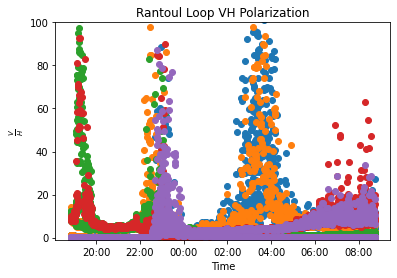

In [16]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(time_1540,vh_1540,label='1540 nm',ls='',marker='o')
ax.plot(time_1545,vh_1545,label='1545 nm',ls='',marker='o')
ax.plot(time_1550,vh_1550,label='1550 nm',ls='',marker='o')
ax.plot(time_1555,vh_1555,label='1555 nm',ls='',marker='o')
ax.plot(time_1560,vh_1560,label='1560 nm',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
ax.set_ylim(bottom=-1,top=100)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")

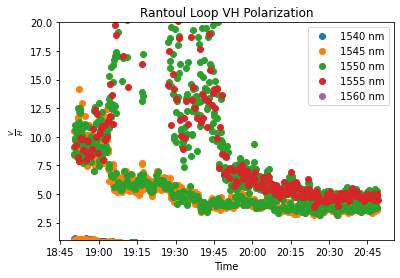

In [17]:
fig, ax = plt.subplots()
num_points = 1000
ax.plot(time_1540[:num_points],vh_1540[:num_points],label='1540 nm',ls='',marker='o')
ax.plot(time_1545[:num_points],vh_1545[:num_points],label='1545 nm',ls='',marker='o')
ax.plot(time_1550[:num_points],vh_1550[:num_points],label='1550 nm',ls='',marker='o')
ax.plot(time_1555[:num_points],vh_1555[:num_points],label='1555 nm',ls='',marker='o')
ax.plot(time_1560[:num_points],vh_1560[:num_points],label='1560 nm',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
ax.set_ylim(bottom=1,top=20)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(loc=1)

In [40]:
for i,n in enumerate([1,2,3]):
    print(i)

0
1
2


In [22]:
avg_vh_1540 = np.mean(np.array(vh_1540)[:-1].reshape(-1, 2), axis=1)
avg_vh_1545 = np.mean(np.array(vh_1545).reshape(-1, 2), axis=1)
avg_vh_1550 = np.mean(np.array(vh_1550).reshape(-1, 2), axis=1)
avg_vh_1555 = np.mean(np.array(vh_1555).reshape(-1, 2), axis=1)
avg_vh_1560 = np.mean(np.array(vh_1560)[:-1].reshape(-1, 2), axis=1)

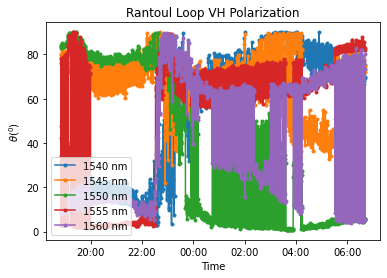

In [29]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_1540[::2][:num_points][::2],np.degrees(np.arctan(avg_vh_1540[:num_points][::2])),label='1540 nm',ls='-',marker='.')
ax.plot(time_1545[::2][:num_points][::2],np.degrees(np.arctan(avg_vh_1545[:num_points][::2])),label='1545 nm',ls='-',marker='.')
ax.plot(time_1550[::2][:num_points][::2],np.degrees(np.arctan(avg_vh_1550[:num_points][::2])),label='1550 nm',ls='-',marker='.')
ax.plot(time_1555[::2][:num_points][::2],np.degrees(np.arctan(avg_vh_1555[:num_points][::2])),label='1555 nm',ls='-',marker='.')
ax.plot(time_1560[::2][:num_points][::2],np.degrees(np.arctan(avg_vh_1560[:num_points][::2])),label='1560 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(loc=3)
plt.savefig('vh_drift_20221214.pdf')

In [26]:
avg_da_1540 = np.mean(np.array(da_1540)[:-1].reshape(-1, 2), axis=1)
avg_da_1545 = np.mean(np.array(da_1545).reshape(-1, 2), axis=1)
avg_da_1550 = np.mean(np.array(da_1550).reshape(-1, 2), axis=1)
avg_da_1555 = np.mean(np.array(da_1555).reshape(-1, 2), axis=1)
avg_da_1560 = np.mean(np.array(da_1560)[:-1].reshape(-1, 2), axis=1)

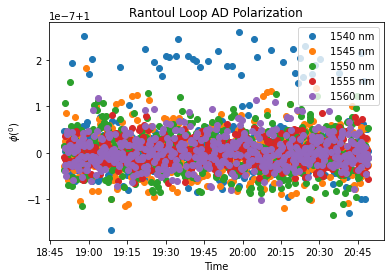

In [27]:
fig, ax = plt.subplots()
num_points = 500
ax.plot(time_1540[::2][:num_points],avg_da_1540[:num_points],label='1540 nm',ls='',marker='o')
ax.plot(time_1545[::2][:num_points],avg_da_1545[:num_points],label='1545 nm',ls='',marker='o')
ax.plot(time_1550[::2][:num_points],avg_da_1550[:num_points],label='1550 nm',ls='',marker='o')
ax.plot(time_1555[::2][:num_points],avg_da_1555[:num_points],label='1555 nm',ls='',marker='o')
ax.plot(time_1560[::2][:num_points],avg_da_1560[:num_points],label='1560 nm',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(loc=1)

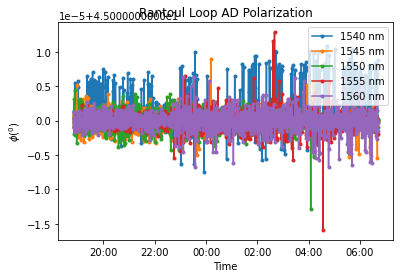

In [30]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_1540[::2][:num_points][::2],np.degrees(np.arctan(avg_da_1540[:num_points][::2])),label='1540 nm',ls='-',marker='.')
ax.plot(time_1545[::2][:num_points][::2],np.degrees(np.arctan(avg_da_1545[:num_points][::2])),label='1545 nm',ls='-',marker='.')
ax.plot(time_1550[::2][:num_points][::2],np.degrees(np.arctan(avg_da_1550[:num_points][::2])),label='1550 nm',ls='-',marker='.')
ax.plot(time_1555[::2][:num_points][::2],np.degrees(np.arctan(avg_da_1555[:num_points][::2])),label='1555 nm',ls='-',marker='.')
ax.plot(time_1560[::2][:num_points][::2],np.degrees(np.arctan(avg_da_1560[:num_points][::2])),label='1560 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=44.99,top=45.01)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(loc=1)
plt.savefig("ad_drift_20221214.pdf")

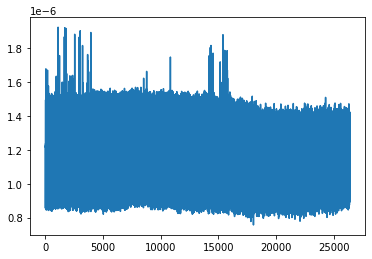

In [16]:
tot = []
for d in data:
    tot.append(d[2]+d[3])
plt.plot(tot)

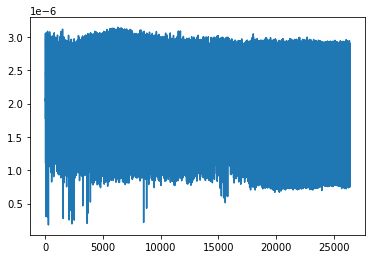

In [17]:
tot = []
for d in data:
    tot.append(d[3]+d[5])
plt.plot(tot)

In [32]:
data[-6:]

array([[ 1.55500000e+03,  1.67111548e+09, -1.31226955e-07,
         1.07597498e-06,  1.61163189e-06,  1.59969750e-06],
       [ 1.55500000e+03,  1.67111549e+09, -1.25736051e-07,
         1.08233871e-06,  1.63152231e-06,  1.60056766e-06],
       [ 1.56000000e+03,  1.67111549e+09, -9.81567609e-08,
         1.08845302e-06,  1.66471477e-06,  1.66471477e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.58216788e-07,
         3.72609122e-07,  1.77063180e-06,  1.70524163e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.53849167e-07,
         3.86546589e-07,  1.72774298e-06,  1.74875231e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.64955689e-07,
         3.63404467e-07,  1.76715093e-06,  1.76180538e-06]])

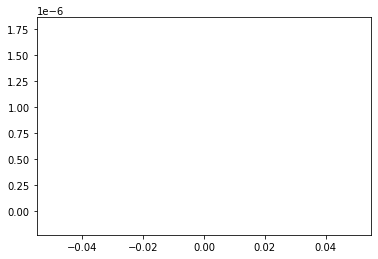